<ipython-input-299-ec0039c015d8>:10: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  img = rgb2gray(img)


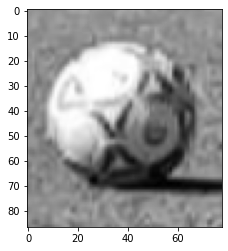

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour
from PIL import Image

img = np.asarray(Image.open('../data/ball_sample2.png'))
img = rgb2gray(img)
plt.imshow(img,cmap='gray')
plt.show()

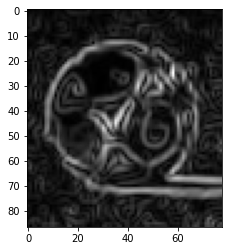

In [ ]:
plt.imshow(sobel(img), cmap='gray')

In [1]:
import cv2 as cv
filename = '../data/ball_sample2.png'

# Loads an image
src = cv.imread(cv.samples.findFile(filename), cv.IMREAD_COLOR)
h, w, _ = src.shape
# Check if image is loaded fine
if src is None:
    print ('Error opening image!')
    print ('Usage: hough_circle.py [image_name -- default ' + default_file + '] \n')
#     return -1


gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)


gray = cv.medianBlur(gray, 1)


rows = gray.shape[0]
circles = cv.HoughCircles(gray, cv.HOUGH_GRADIENT, 1, max(h,w),
                           param1=100, param2=10,
                           minRadius=min(h,w)//4, maxRadius=max(h,w)//2)


if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        # circle center
        cv.circle(src, center, 1, (0, 100, 100), 3)
        # circle outline
        radius = i[2]
        cv.circle(src, center, radius, (255, 0, 255), 1)
else:
    print('not found')
    
plt.imshow(src)

error: OpenCV(4.5.1) /tmp/pip-req-build-j6tkfxml/opencv/modules/core/src/utils/samples.cpp:62: error: (-2:Unspecified error) OpenCV samples: Can't find required data file: ../data/ball_sample2.png in function 'findFile'
